# 1) Problem Statement

The main objective of this project is to predict if the customer will churn or not from the bank using the important features

#### Source dataset: https://www.kaggle.com/shivan118/churn-modeling-dataset

In [2]:
#Checking the current file directory

import os

os.getcwd()

'C:\\Users\\ADMIN\\Documents\\DMML'

In [3]:
# Importing the packages for analysis


import numpy as np  # linear algebra
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2) Preprocessing the dataset

Importing the raw data of bank churn data set

In [4]:
bd = pd.read_csv("C:\\Users\\ADMIN\\Documents\\DMML\\Churn_Modelling.csv")

Displaying the first 5 rows

In [5]:
bd.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# The information of the fields are attained

bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Statistic analysis of the bank dataset
bd.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Total table info

In [8]:
bd

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Verification of null values

In [9]:
# Getting the number of (rows, columns)
bd.shape

(10000, 14)

In [10]:
 # IsNull is used to find count of the null values column wise
bd.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# find count of the null values dataframe wise
bd.isnull().sum().sum()

0

In [12]:
# boolean result of null outcomes
bd.isnull().values.any()

False

In [13]:
# Dropping the duplicate records
bd1=bd.drop_duplicates()

In [14]:
bd1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


RowNumber, CustomerId, and Surname columns do not have quantitative influence on the imputations as they are unique and contain personal information. These fields are removed from dataset for further analysis.

In [15]:
# removing the unwanted columns (RowNumber, CustomerId, Surname)

bd.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [16]:
bd.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
bd.shape

(10000, 11)

Unique values of each field is analysed


In [18]:
# checking the unique values 
bd.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

Checking the datatype of all the features

In [19]:
bd.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

From the observation, there are two kinds of variables:  
1)Categorical variables: Geography, Gender, NumOfProducts, HasCrCard, IsActiveMember and Exited.  
2)Numerical varibales(Float,Int): CreditScore, Age, Tenure,Balance,EstimatedSalary

## 3) Data Visualisation

Text(0.5, 1, 'CORRELATION')

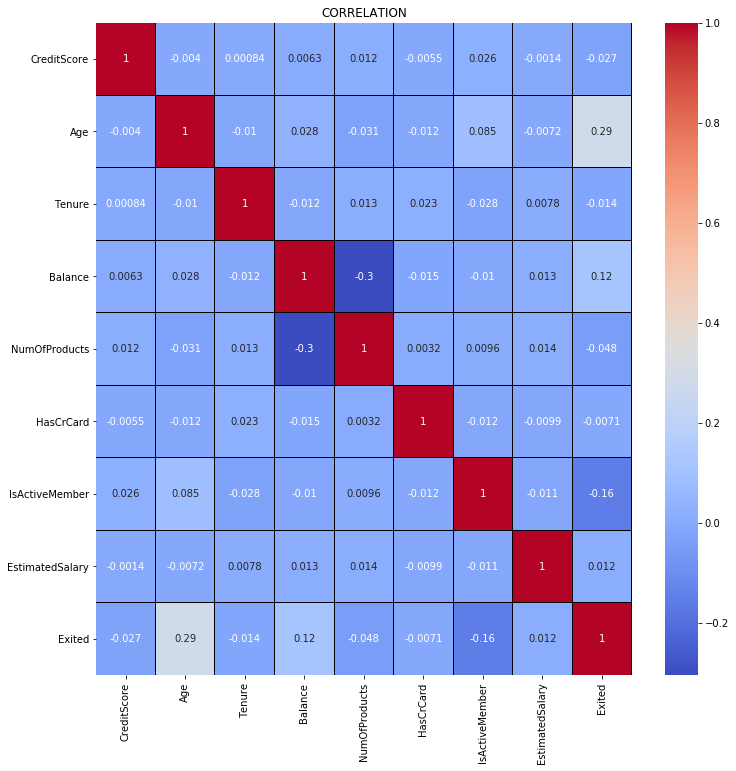

In [20]:
# Correlation determines the collinearity between various variables
corr = bd.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr  , linewidths= 0.01 , linecolor= "black" , cmap= "coolwarm" , annot = True).set_title("Correlation".upper())

The above diagram illustrates 'Age', 'Balance' fields have strong relationship with the dependent variable

## Visualization of numerical variables

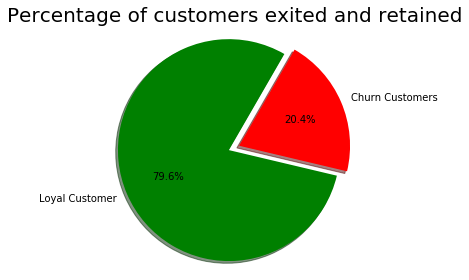

In [21]:
# To find the percentage of exited customer using pie chart
ExitedValues = bd.Exited.value_counts()

fig, f = plt.subplots()
explode=[0.1,0]
f.pie(ExitedValues,labels=["Loyal Customer","Churn Customers"],explode=explode, colors = ["green","red"], autopct='%1.1f%%',shadow=True, startangle=60) 
f.axis('equal')
plt.title("Percentage of customers exited and retained", size = 20)

plt.tight_layout()
plt.show()

It is clear from the pie chart that nearly 20% of customers have attrited from the current bank

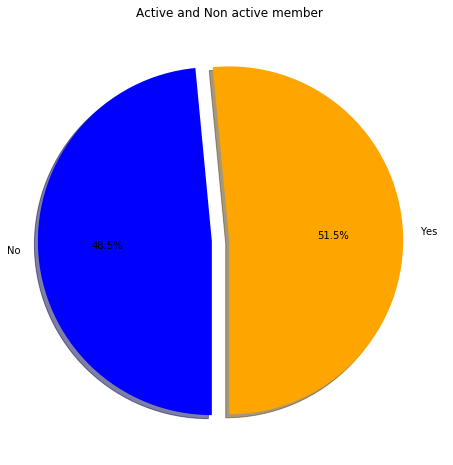

In [22]:
# To find the percentage of active customer using pie chart
active  = bd["IsActiveMember"].value_counts(sort =True)
colors = ["orange","blue"]
labels = ["Yes","No"]
explode = (0, 0.1)
plt.figure(figsize=(10 , 8))
plt.pie(active,colors=colors,autopct='%1.1f%%',shadow=True,startangle = 270 ,explode= explode, labels=labels)
plt.title("Active and Non active member")
plt.show()

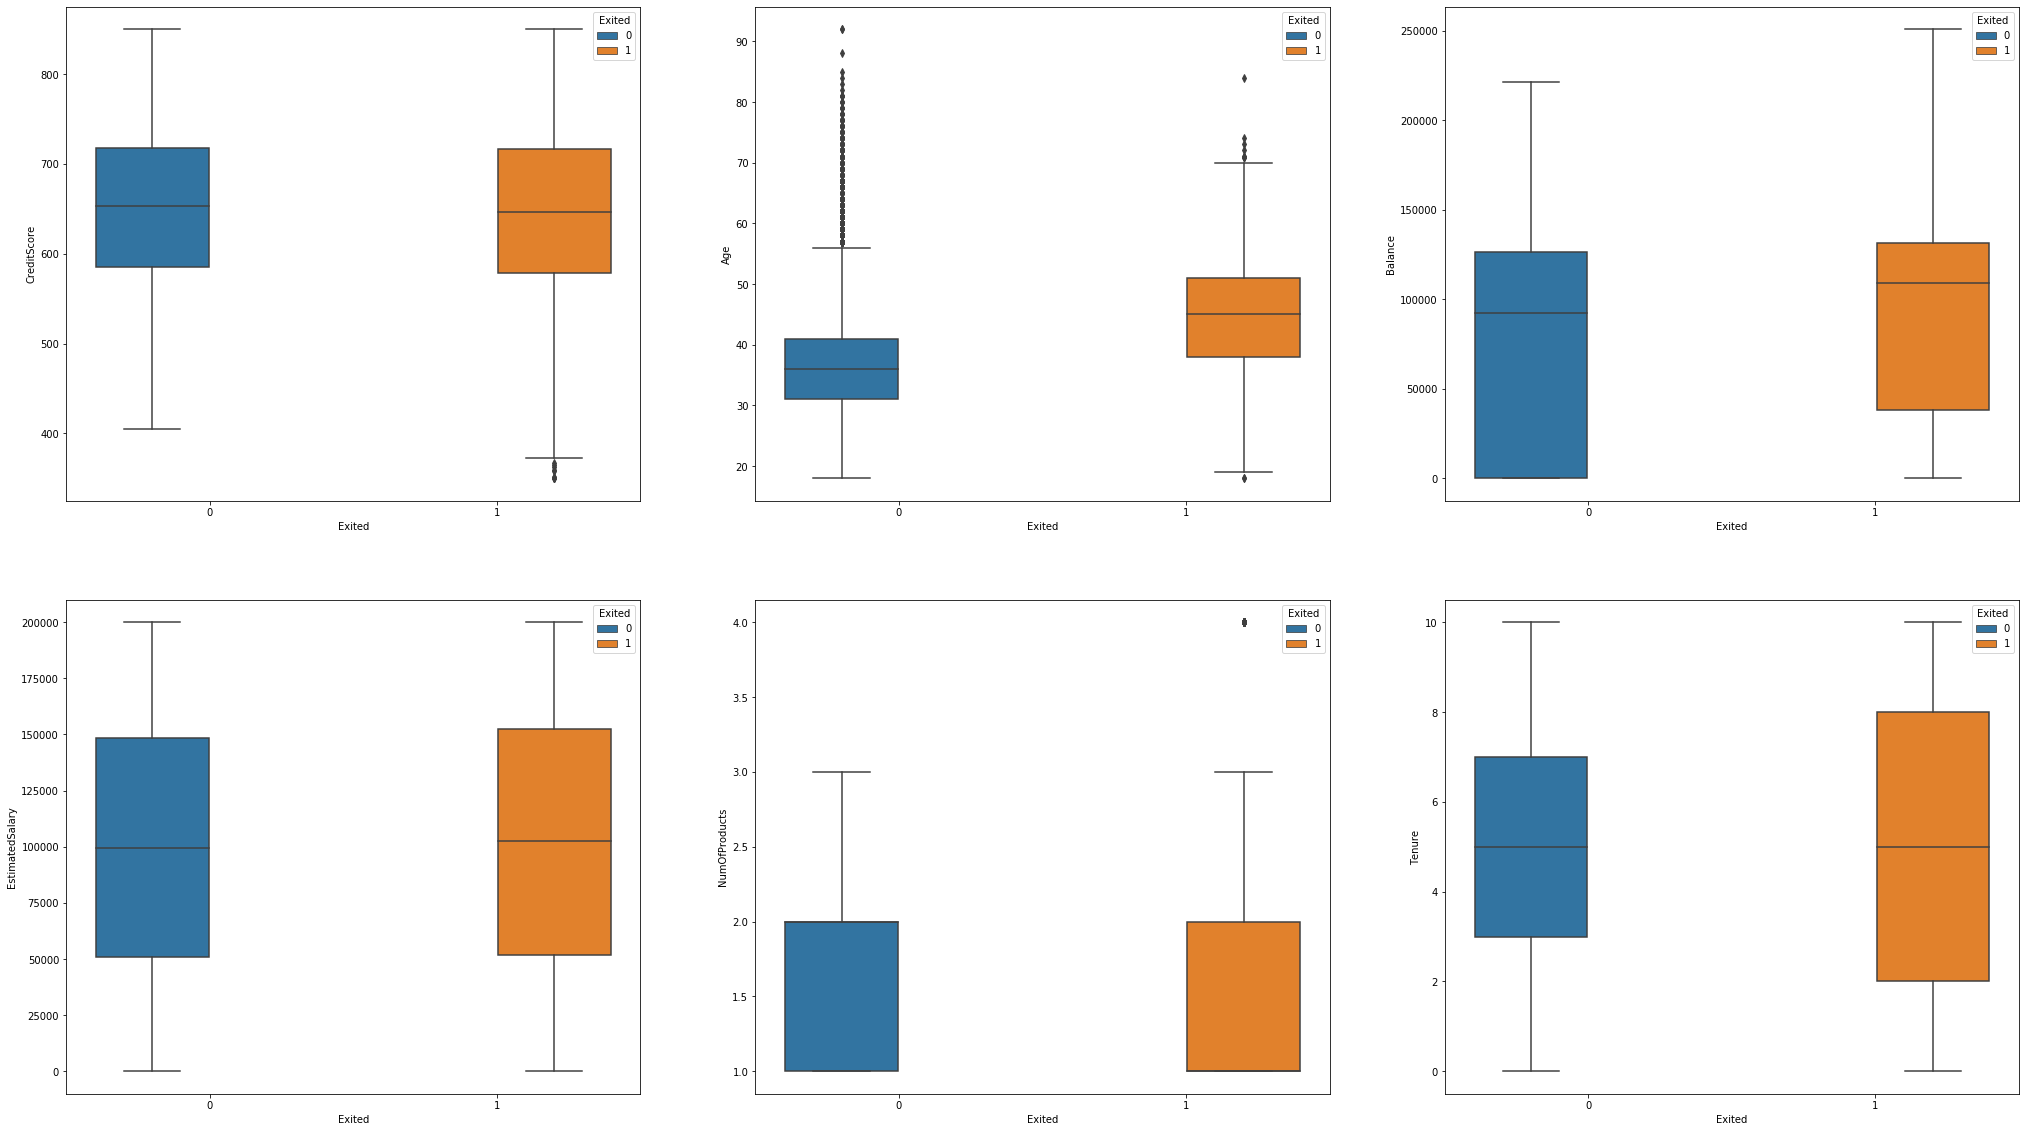

In [23]:

# Boxplot to identify the dependence of 'Exited' column on continuous and numerical features

fig, ax = plt.subplots(2, 3, figsize=(35, 20))

sns.boxplot(data=bd, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=bd, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=bd, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=bd, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=bd, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=bd, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

plt.show()

Credit Score: Credit Score has no effective impact on the customer churn as seen in the plot
Age: From the plot, we find older age customers likely to churn keeping younger groups in the bank.  
Balance: Customer with high balance accounts have exited as per graph which in turn affects the banks capital.  
Estimated Salary: Estimated Salary does not have much influence on the churn if customers.  
Number of Products: We see that the number of products also does not seem to affect the customer churn.  
Tenure: Customer present both in the two extreme tenure groups (new joinees and older ones) are more likely to be churned.  

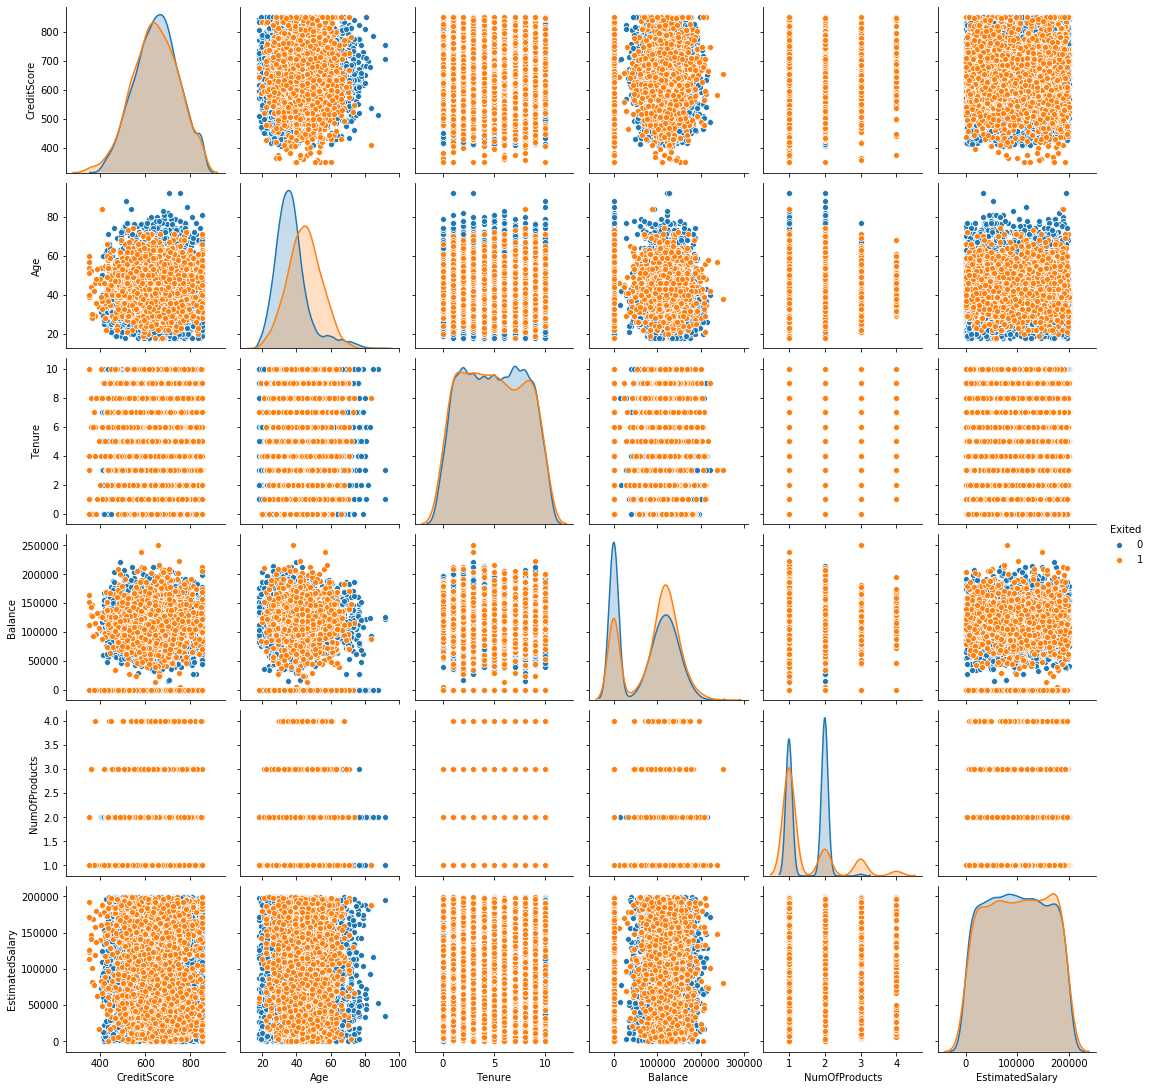

In [24]:
# To find distribution of single variable(Exited) across two field relationships

bd_num = bd[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary",'Exited']]
sns.pairplot(bd_num, hue="Exited")


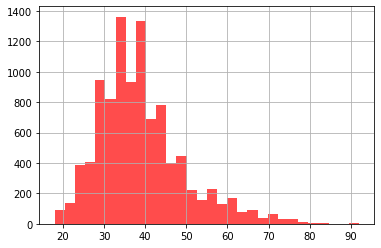

In [25]:
# The histogram is plooted to find the count of different age groups

bd['Age'].hist(bins=30,color='red',alpha=0.7)

The histogram shows a higher count of people between 30 and 40 age group

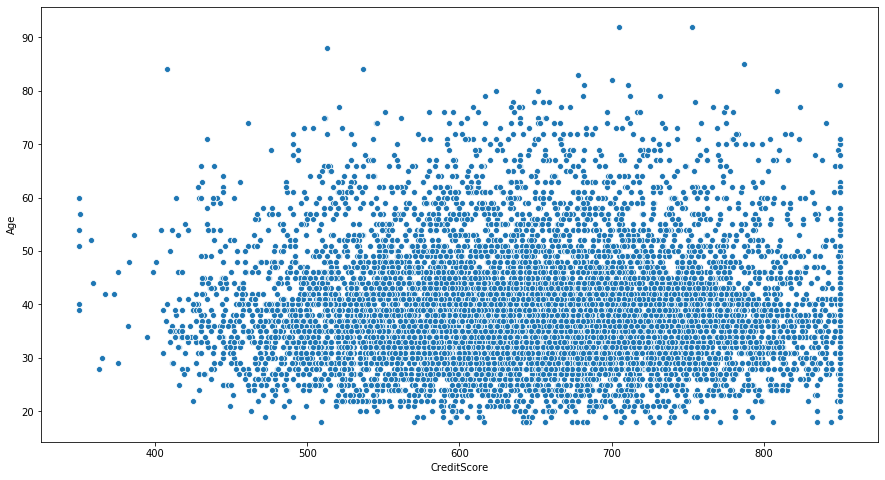

In [27]:
# Scactter plot to find the relation between two variables
plt.figure(figsize=(15, 8))
sns.scatterplot(x='CreditScore', data=bd, y='Age')

It is clear from the plot that there is no relation with age and creditscore

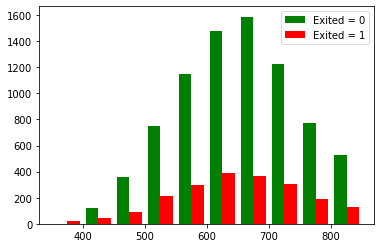

In [28]:
# Histogram is plotted to show the range of credit score influencing customer churn
credit_exited = bd[bd.Exited== 1].CreditScore
credits_notexited = bd[bd.Exited== 0].CreditScore

plt.hist([credits_notexited,credit_exited], label = ['Exited = 0', 'Exited = 1'], color=['g','r'] )
plt.legend()

Credit score ranging between 600-700 has greater retention of customer as interpreted from the histogram

## Visualization of categorical columns

Text(0.5, 1.0, 'Countplot for Geography ')

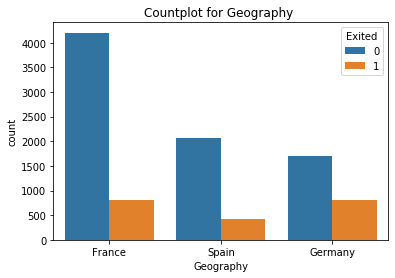

In [29]:
# Analysis of churn based on geography

sns.countplot(x='Geography', hue = 'Exited',data = bd).set_title('Countplot for Geography ')

Text(0.5, 1.0, 'Countplot for Gender Column')

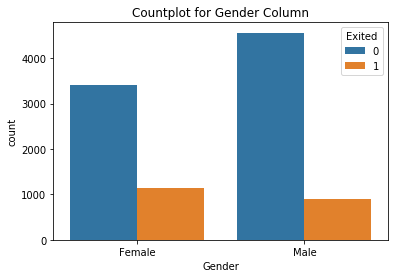

In [30]:
# Analysis of churn based on gender

sns.countplot(x='Gender', hue = 'Exited',data = bd).set_title('Countplot for Gender Column')

Text(0.5, 1.0, 'Countplot for having creditcard Column')

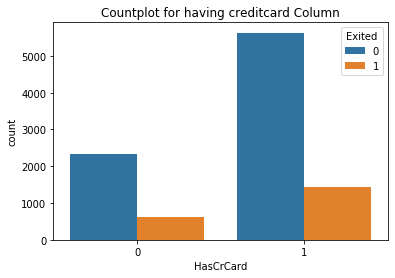

In [31]:
# Analysis of churn based on having credit card 

sns.countplot(x='HasCrCard', hue = 'Exited',data = bd).set_title('Countplot for having creditcard Column')

Text(0.5, 1.0, 'Countplot-IsActiveMember Column')

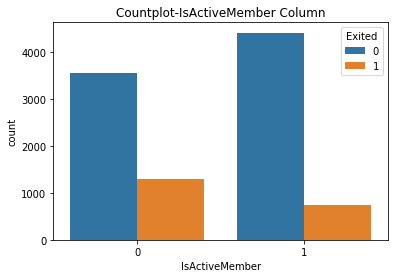

In [32]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = bd).set_title('Countplot-IsActiveMember Column')


Text(0.5, 1.0, 'Countplot based on no of products')

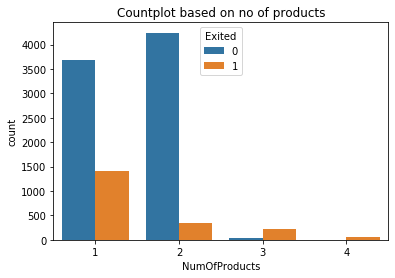

In [33]:
sns.countplot(x='NumOfProducts', hue = 'Exited',data = bd).set_title('Countplot based on no of products')


Based on inference from above countplots of categorical fields  
1) The retention of customers is highest in France whereas Germany has more number of exited customer which requires focus to retain existing customer.    
2) The attrition rate of female clients are higher compared to males.  
3) Credit card holding customers churned more which can be seen as a coincidence.   
4) Typically, the inactive customer has more rate of churn.  
5) A proper inference cannot be made but members with higher products showed a less chance of exiting.  

Outlier Analysis

In [34]:
# The checking of outliers is done on the fields selected

for f in bd[['CreditScore','Tenure', 'Balance','EstimatedSalary']]:
    
    Q1 = bd[f].quantile(0.25)
    Q3 = bd[f].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if bd[(bd[f] > upper)].any(axis=None):
        print(f,"Outlier:yes")
    else:
        print(f, "Outlier:no")

CreditScore Outlier:no
Tenure Outlier:no
Balance Outlier:no
EstimatedSalary Outlier:no


## 4) Machine Learning Model Building

In [48]:
# The spliting of predictors and target
X = bd.iloc[:, :10].values
y = bd.iloc[:, 10].values

In [36]:
# Display of predictors
pd.DataFrame(X).head(5)

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0,1,1,1,101349
1,608,Spain,Female,41,1,83807.9,1,0,1,112543
2,502,France,Female,42,8,159661,3,1,0,113932
3,699,France,Female,39,1,0,2,0,0,93826.6
4,850,Spain,Female,43,2,125511,1,1,1,79084.1


In [37]:
# Display of target
pd.DataFrame(y).head(5)

,0
0,1
1,0
2,1
3,0
4,0


In [38]:
#The gender column is converted to numeric form using LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X1 = LabelEncoder()
X[:, 2] = labelencoder_X1.fit_transform(X[:, 2])

In [39]:

#The geography column is converted to numeric form using LabelEncoder
labelencoder_X2 = LabelEncoder()
X[:, 1] = labelencoder_X2.fit_transform(X[:, 1])

In [40]:
# After one hot encoding
pd.DataFrame(X).head(5)

,0,1,2,3,4,5,6,7,8,9
0,619,0,0,42,2,0,1,1,1,101349
1,608,2,0,41,1,83807.9,1,0,1,112543
2,502,0,0,42,8,159661,3,1,0,113932
3,699,0,0,39,1,0,2,0,0,93826.6
4,850,2,0,43,2,125511,1,1,1,79084.1


In [43]:
# The processed final data is split into train(75%) and test(25%) set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1975
           1       0.48      0.51      0.49       525

    accuracy                           0.78      2500
   macro avg       0.67      0.68      0.68      2500
weighted avg       0.79      0.78      0.78      2500

[[1689  286]
 [ 259  266]]
   TN    FP
   FN    TP
Accuracy Score : 0.782
F Score 0.5015082956259427


Text(0.5, 15.0, 'Predicted label')

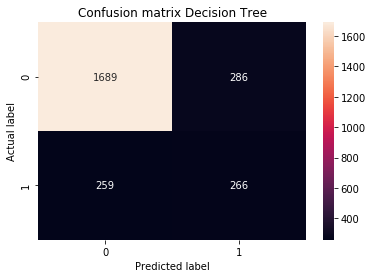

In [44]:
# Importing the libraries required for obtaining evaluation metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)


print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

cm1 = confusion_matrix(y_test, predictions)

p_1 = sns.heatmap(pd.DataFrame(cm1), annot=True, fmt='g')
plt.title('Confusion matrix Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

This model has 78% Accuracy and 51% F-score. Also 53% recall score for True Positive cases of Exited. We can consider this model if no other model perform better than this.

### Gradient Boosting

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1975
           1       0.80      0.50      0.61       525

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500

[[1909   66]
 [ 263  262]]
   TN    FP
   FN    TP
Accuracy Score : 0.8684
F Score 0.5395387149917629


Text(0.5, 15.0, 'Predicted label')

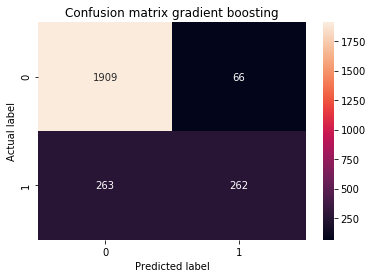

In [38]:
# Implementation of Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(random_state=101)
grad.fit(X_train,y_train)
predictions = grad.predict(X_test)

# Classfication Report generation 
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

# Visualization of confusion matrix
cm2 = confusion_matrix(y_test, predictions)

p_1 = sns.heatmap(pd.DataFrame(cm2), annot=True, fmt='g')
plt.title('Confusion matrix gradient boosting', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Naïve Bayes model

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1975
           1       0.30      0.06      0.11       525

    accuracy                           0.77      2500
   macro avg       0.55      0.51      0.49      2500
weighted avg       0.69      0.77      0.71      2500

[[1896   79]
 [ 491   34]]
   TN    FP
   FN    TP
Accuracy Score : 0.772
F Score 0.07681879801174875


Text(0.5, 15.0, 'Predicted label')

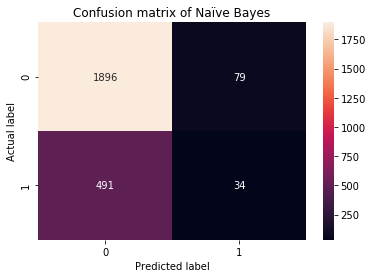

In [39]:
# Implementation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
predictions = gnb.predict(X_test)

# Classfication Report generation 
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

# Visualization of confusion matrix
cm3 = confusion_matrix(y_test, predictions)

p_1 = sns.heatmap(pd.DataFrame(cm3), annot=True, fmt='g')
plt.title('Confusion matrix of Naïve Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



### Random Forest Model

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1975
           1       0.81      0.50      0.61       525

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500

[[1912   63]
 [ 264  261]]
   TN    FP
   FN    TP
Accuracy Score : 0.8692
F Score 0.5383663366336633


Text(0.5, 15.0, 'Predicted label')

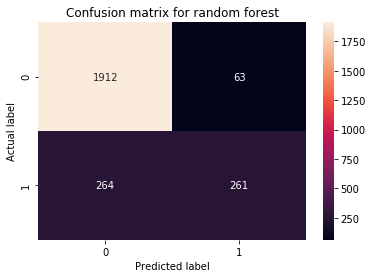

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

# Classfication Report generation 
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))


# Visualization of confusion matrix
cm4 = confusion_matrix(y_test, predictions)

p_1 = sns.heatmap(pd.DataFrame(cm4), annot=True, fmt='g')
plt.title('Confusion matrix for random forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 5) Evaluation Metrics

In [46]:
# The method to measure and visualize the metrics
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def ev_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5', color='r')
    
    return model, accuracy, roc_auc, time_taken

Accuracy = 0.772
ROC Area under Curve = 0.5123809523809524
Time taken = 0.01695561408996582
              precision    recall  f1-score   support

           0    0.79430   0.96000   0.86933      1975
           1    0.30088   0.06476   0.10658       525

    accuracy                        0.77200      2500
   macro avg    0.54759   0.51238   0.48795      2500
weighted avg    0.69068   0.77200   0.70915      2500



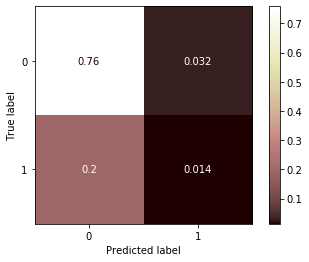

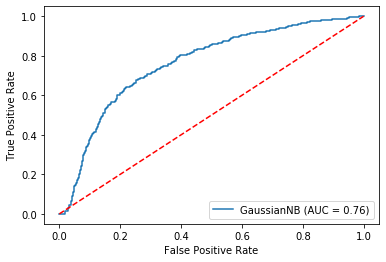

In [47]:
# Classification Report , Confusion Matrix and ROC curve for Naive Bayes

from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()


model_gnb, accuracy_gnb, roc_auc_gnb, tt_gnb = ev_model(model_gnb, X_train, y_train, X_test, y_test)

Accuracy = 0.8684
ROC Area under Curve = 0.7328149487643159
Time taken = 1.0581696033477783
              precision    recall  f1-score   support

           0    0.87891   0.96658   0.92067      1975
           1    0.79878   0.49905   0.61430       525

    accuracy                        0.86840      2500
   macro avg    0.83885   0.73281   0.76748      2500
weighted avg    0.86209   0.86840   0.85633      2500



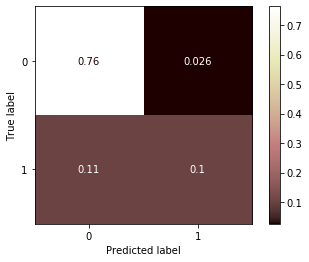

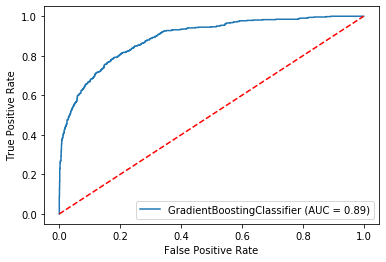

In [45]:
# Classification Report , Confusion Matrix and ROC curve for GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model_GB = GradientBoostingClassifier(random_state=101)
model_GB, accuracy_dt, roc_auc_dt, tt_dt = ev_model(model_GB, X_train, y_train, X_test, y_test)

Accuracy = 0.8732
ROC Area under Curve = 0.7393490054249547
Time taken = 3.093722343444824
              precision    recall  f1-score   support

           0    0.88132   0.97013   0.92360      1975
           1    0.81902   0.50857   0.62750       525

    accuracy                        0.87320      2500
   macro avg    0.85017   0.73935   0.77555      2500
weighted avg    0.86824   0.87320   0.86142      2500



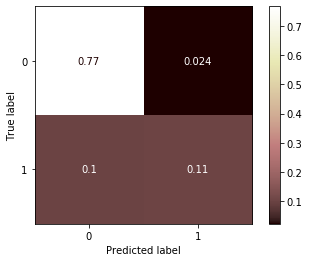

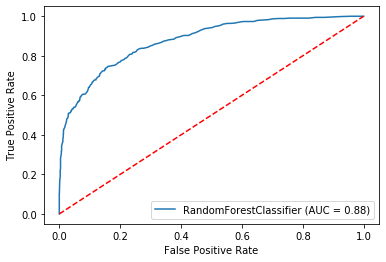

In [51]:
# Classification Report , Confusion Matrix and ROC curve for Random Forest

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=300)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = ev_model(model_rf, X_train, y_train, X_test, y_test)